In [439]:
'''
!pip install numpy 
!pip install pandas 
!pip install sklearn 
!pip install sklearn.preprocessing 
!pip install matplotlib
!pip install scikit-learn
!pip install sklearn.neighbors
!pip install sklearn.model_selection
!pip install sklearn.metrics
!pip install sklearn.cluster
!pip install gradio
'''


'\n!pip install numpy \n!pip install pandas \n!pip install sklearn \n!pip install sklearn.preprocessing \n!pip install matplotlib\n!pip install scikit-learn\n!pip install sklearn.neighbors\n!pip install sklearn.model_selection\n!pip install sklearn.metrics\n!pip install sklearn.cluster\n!pip install gradio\n'

In [440]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import gradio as gr
%matplotlib inline

In [441]:
#Creating a data frame of the training csv file
df_train = pd.read_csv(r"C:\Users\pandi\Downloads\house-prices-advanced-regression-techniques\train.csv")
#Replacing all the N/A values with Zero
df_train.fillna(0, inplace=True)
#Creating Dataframe of tesing csv file 
df_test = pd.read_csv(r"C:\Users\pandi\Downloads\house-prices-advanced-regression-techniques\test.csv")
#Replacing all the N/A values with Zero
df_test.fillna(0, inplace=True)

In [442]:
#Checking the names of the data and number of their occurences in MSZoning Column
#df_train['LotFrontage'].value_counts()

In [443]:
# Applying LabelEncoder to the MSZoning Column to provide each label with a numerical value
#in training dataset
le_MSZ = LabelEncoder()
le_MSZ.fit(['RL','RM','RH','FV', 'C '])
df_train['MSZoning'] = le_MSZ.transform(df_train['MSZoning'])


In [444]:
le_street = LabelEncoder()
le_street.fit(['Pave','Grvl'])
df_train['Street'] = le_street.transform(df_train['Street'])

In [445]:
le_alley = LabelEncoder()
le_alley.fit(['Pave','Grvl', '0'])
df_train['Alley'] = le_alley.transform(df_train['Alley'])

In [446]:
le_lotshape = LabelEncoder()
le_lotshape.fit(['Reg','IR1', 'IR2', 'IR3'])
df_train['LotShape'] = le_lotshape.transform(df_train['LotShape'])

In [447]:
le_landcontour = LabelEncoder()
le_landcontour.fit(['Lvl','Bnk', 'HLS', 'Low'])
df_train['LandContour'] = le_landcontour.transform(df_train['LandContour'])

In [448]:
# Applying LabelEncoder to the MSZoning Column to provide each label with a numerical value
#in testing dataset
le_MSZ1 = LabelEncoder()
le_MSZ1.fit(['RL','RM','RH','FV', 'C ','0'])
df_test['MSZoning'] = le_MSZ1.transform(df_test['MSZoning'])

In [449]:
le_street = LabelEncoder()
le_street.fit(['Pave','Grvl'])
df_test['Street'] = le_street.transform(df_test['Street'])

In [450]:
le_alley = LabelEncoder()
le_alley.fit(['Pave','Grvl', '0'])
df_test['Alley'] = le_alley.transform(df_test['Alley'])

In [451]:
le_lotshape = LabelEncoder()
le_lotshape.fit(['Reg','IR1', 'IR2', 'IR3'])
df_test['LotShape'] = le_lotshape.transform(df_test['LotShape'])

In [452]:
le_landcontour = LabelEncoder()
le_landcontour.fit(['Lvl','Bnk', 'HLS', 'Low'])
df_test['LandContour'] = le_landcontour.transform(df_test['LandContour'])

In [453]:
#Creating a Numpy array from the pandas dataframe for training
#X = df[['Id', 'MSSubClass','MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape','LandContour', 'Utilities']] .values
X_train = np.asanyarray(df_train[['MSSubClass','LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape','LandContour']])

#For training inputting the Sale Price corresponding to attributes of the house
Y_train = np.asanyarray(df_train[['SalePrice']])

#Creating a numpy array of from dataframe for testing 
X_new = np.asanyarray(df_test[['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape','LandContour']])


#Printing the dataframe to figure the different attributes of the dataframe
print(X_new)
print(df_train)
#Standardizing the data
X_train = preprocessing.StandardScaler().fit_transform(X_train.astype(float))
X_new = preprocessing.StandardScaler().fit_transform(X_new.astype(float))

[[2.0000e+01 8.0000e+01 1.1622e+04 ... 0.0000e+00 3.0000e+00 3.0000e+00]
 [2.0000e+01 8.1000e+01 1.4267e+04 ... 0.0000e+00 0.0000e+00 3.0000e+00]
 [6.0000e+01 7.4000e+01 1.3830e+04 ... 0.0000e+00 0.0000e+00 3.0000e+00]
 ...
 [2.0000e+01 1.6000e+02 2.0000e+04 ... 0.0000e+00 3.0000e+00 3.0000e+00]
 [8.5000e+01 6.2000e+01 1.0441e+04 ... 0.0000e+00 3.0000e+00 3.0000e+00]
 [6.0000e+01 7.4000e+01 9.6270e+03 ... 0.0000e+00 3.0000e+00 3.0000e+00]]
        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      0   
1        2          20         3         80.0     9600       1      0   
2        3          60         3         68.0    11250       1      0   
3        4          70         3         60.0     9550       1      0   
4        5          60         3         84.0    14260       1      0   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0

In [454]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (1168, 7) (1168, 1)
Test set: (292, 7) (292, 1)


In [455]:
#Assuming a random K to train the model and check predicitions
k = 4
#Training model
neigh = KNeighborsRegressor(n_neighbors = k)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=4)

In [456]:
#Predicting the Sale price in the Testing Data
prediction = neigh.predict(X_test)
print(prediction)

[[207475.  ]
 [198125.  ]
 [132362.5 ]
 [176350.  ]
 [ 88850.  ]
 [ 88850.  ]
 [111475.  ]
 [198887.5 ]
 [250119.25]
 [216725.  ]
 [128350.  ]
 [186225.  ]
 [ 97287.5 ]
 [108625.  ]
 [143112.5 ]
 [228333.75]
 [122725.  ]
 [121475.  ]
 [301250.  ]
 [132725.  ]
 [241829.75]
 [229978.75]
 [371125.  ]
 [247750.  ]
 [288299.5 ]
 [318500.  ]
 [309000.  ]
 [187150.  ]
 [112250.  ]
 [114075.  ]
 [328568.25]
 [177000.  ]
 [260725.  ]
 [193843.75]
 [170187.5 ]
 [159500.  ]
 [223450.  ]
 [211687.5 ]
 [176375.  ]
 [142725.  ]
 [158375.  ]
 [125800.  ]
 [136714.5 ]
 [132362.5 ]
 [117463.25]
 [217500.  ]
 [211462.5 ]
 [180125.  ]
 [227848.25]
 [201625.  ]
 [363450.  ]
 [214848.25]
 [137062.5 ]
 [125800.  ]
 [161375.  ]
 [171612.5 ]
 [132750.  ]
 [128100.  ]
 [262975.  ]
 [167275.  ]
 [182900.  ]
 [153725.  ]
 [153250.  ]
 [317645.25]
 [316737.5 ]
 [215750.  ]
 [133000.  ]
 [207125.  ]
 [276447.5 ]
 [299843.5 ]
 [204875.  ]
 [199350.  ]
 [128600.  ]
 [166000.  ]
 [132125.  ]
 [279732.5 ]
 [232415.25]

In [457]:
mse = mean_squared_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4390897429.289812
R-squared: 0.20913418991403931


In [458]:
# Define a range of k values to try
k_values = range(1, 21)

# Initialize variables to store the best k and corresponding R^2 score
best_k = None
best_r2_score = -float('inf')

# Iterate over each k value
for k in k_values:
    # Train KNN regression model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    
    # Predict on the validation set
    predictions = knn_model.predict(X_test)
    
    # Calculate R^2 score
    r2 = r2_score(Y_test, predictions)
    
    # Update best k and R^2 score if current k is better
    if r2 > best_r2_score:
        best_k = k
        best_r2_score = r2

# Print the best k and corresponding R^2 score
print(f"Best k: {best_k}")
print(f"Best R^2 Score on Validation Set: {best_r2_score}")

Best k: 11
Best R^2 Score on Validation Set: 0.29519374427441136


In [459]:
#Assuming a best K to train the model and check predicitions
#Training model
neigh = KNeighborsRegressor(n_neighbors = best_k)
neigh.fit(X_train, Y_train)
final_predict = neigh.predict(X_new)

#Overlaying the predicition column in the testing dataframe
df_test['SalePrice'] = final_predict
df_submission = df_test[['Id','SalePrice']]
df_submission.head()


,Id,SalePrice
0,1461,206013.636364
1,1462,256734.545455
2,1463,234204.181818
3,1464,252227.272727
4,1465,207054.545455


In [460]:
#Creating a new dataframe with just continuous numerical data
#We will be clustering on the following 3 attributes of the dataframe
df_clustering = df_train[['LotFrontage','LotArea','SalePrice']]
df_clustering.head()

,LotFrontage,LotArea,SalePrice
0,65.0,8450,208500
1,80.0,9600,181500
2,68.0,11250,223500
3,60.0,9550,140000
4,84.0,14260,250000


In [461]:
#Creating a list of just numerical values by selectively not choosing labels
Z = df_clustering.values
print(Z)
#Standardizes data
House_dataset = preprocessing.StandardScaler().fit_transform(Z)
House_dataset

[[6.50000e+01 8.45000e+03 2.08500e+05]
 [8.00000e+01 9.60000e+03 1.81500e+05]
 [6.80000e+01 1.12500e+04 2.23500e+05]
 ...
 [6.60000e+01 9.04200e+03 2.66500e+05]
 [6.80000e+01 9.71700e+03 1.42125e+05]
 [7.50000e+01 9.93700e+03 1.47500e+05]]


array([[ 0.2128772 , -0.20714171,  0.34727322],
       [ 0.64574726, -0.09188637,  0.00728832],
       [ 0.29945121,  0.07347998,  0.53615372],
       ...,
       [ 0.2417352 , -0.14781027,  1.07761115],
       [ 0.29945121, -0.08016039, -0.48852299],
       [ 0.50145724, -0.05811155, -0.42084081]])

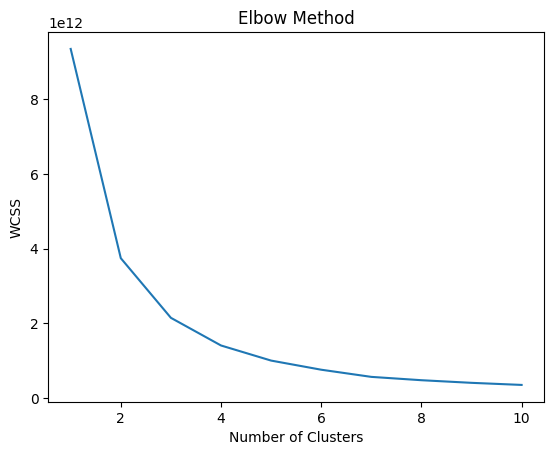

In [462]:
#Determining the right amount of clusters for the optimum distrubution 
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [463]:
'''Elbow is formed at clusterNum =3'''

'Elbow is formed at clusterNum =3'

In [464]:
#Using kMeans
clusterNum = 3

k_means = KMeans(init = 'k-means++', n_clusters = clusterNum, n_init = 12)
k_means.fit(Z)

#Labelling each house according to its cluster
labels = k_means.labels_
df_clustering['ClusterLabels'] = labels
Z = df_clustering.values
df_clustering.head()

C:\Users\pandi\AppData\Local\Temp\ipykernel_23728\3419634458.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['ClusterLabels'] = labels


,LotFrontage,LotArea,SalePrice,ClusterLabels
0,65.0,8450,208500,2
1,80.0,9600,181500,2
2,68.0,11250,223500,2
3,60.0,9550,140000,0
4,84.0,14260,250000,2


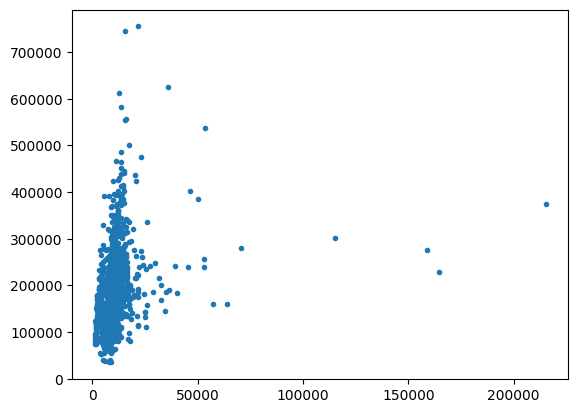

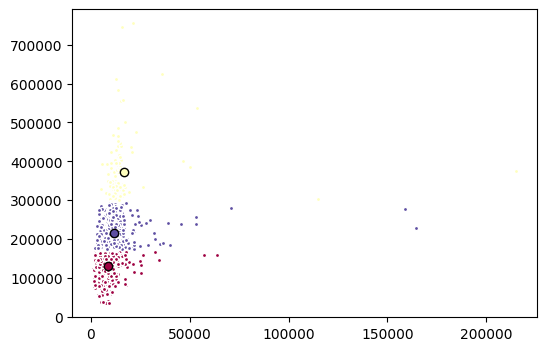

In [465]:
#Plotting centroid of the three clusters
plt.scatter(Z[:, 1], Z[:, 2], marker='.')
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means.cluster_centers_)), colors):
    my_members = (k_means.labels_ == k)
    cluster_center = k_means.cluster_centers_[k]
    ax.plot(Z[my_members, 1], Z[my_members, 2], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[1], cluster_center[2], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

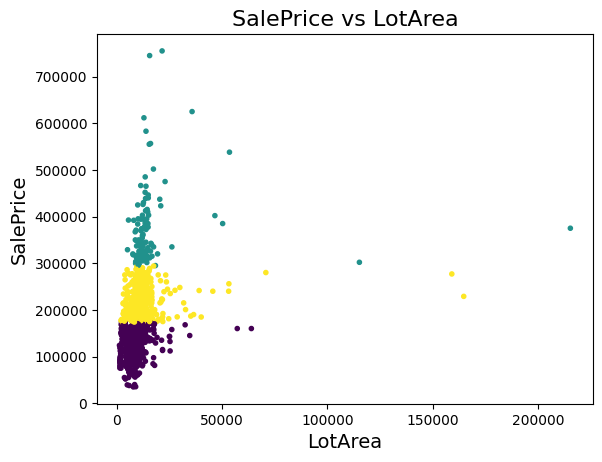

In [466]:
#Visualizing the cluster in terms of SaePrice vs Lot Area
plt.scatter(Z[:,1],Z[:,2], marker='.', c = labels)
plt.xlabel('LotArea', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.title('SalePrice vs LotArea', fontsize=16)
plt.show()

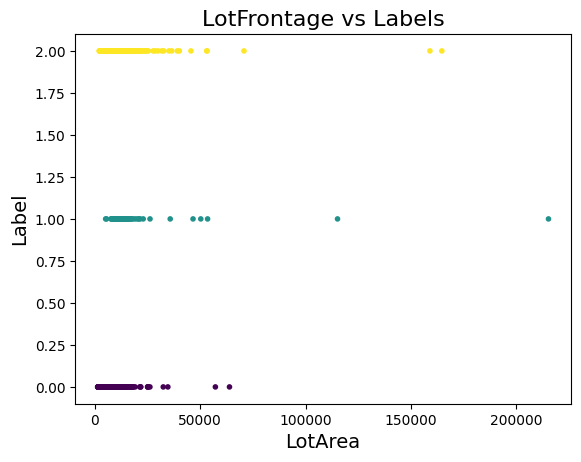

In [467]:
plt.scatter(Z[:,1],Z[:,3], marker='.', c= labels)
plt.xlabel('LotArea', fontsize=14)
plt.ylabel('Label', fontsize=14)
plt.title('LotFrontage vs Labels', fontsize=16)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


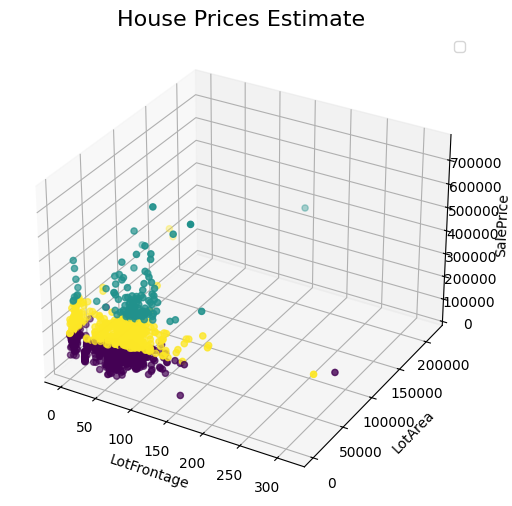

In [468]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('LotFrontage')
ax.set_ylabel('LotArea')
ax.set_zlabel('SalePrice')
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c= labels.astype(float))
ax.set_title('House Prices Estimate', fontsize =16)
ax.legend()

In [469]:
import gradio as gr

In [470]:
def prediction_value(LotArea,LotFrontage,Street, Alley, LotShape, LandContour):
    raw = [70,Lotarea,Quality,codition,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,rooms,1,3,GarageArea,0,35,272,0,0,poolarea,0]
#raw = [70,9660,7,5,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,5,1,3,82,0,35,272,0,0,0,0]
    raw = np.array(raw,dtype=np.float64).reshape(1,-1)
    #raw = raw.reshape(-1,1)
    answer = neigh.predict(raw)
    answer = float(answer[0][0])

    return answer

In [471]:
def greet(name):
    instructions = (
        "While entering Street:\n\n"
        "If enter 1 if street is Pave and enter 0 if street is Gravel\n\n"
        "While entering Alley:\n"
        "If enter 1 if Alley is Pave, Enter 0 if Alley is None, and Enter 2 if Alley is Gravel\n\n"
        "While entering LotShape:\n"
        "If enter 0 if LotShape is Reg, Enter 1 if LotShape is IR1, Enter 2 if LotShape is IR2, and Enter 3 if LotShape is IR3\n\n"
        "While entering LandContour:\n"
        "If enter 0 if LandContour is Level, Enter 1 if LandContour is Bnk, Enter 2 if LandContour is HLS, and Enter 3 if LandContour is Low"
    )
    return "Hello " + name + "! Thank You For Visiting!"+ instructions

In [472]:
iface = gr.Interface(
    fn=greet,
    inputs=gr.Textbox(),
    outputs=gr.Textbox(),
    live=True,
)

iface.launch(share = True)

Running on local URL:  http://127.0.0.1:7875

Could not create share link. Missing file: c:\Users\pandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\frpc_windows_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.2
3. Move the file to this location: c:\Users\pandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio


In [473]:
# Gradio interface
iface = gr.Interface(
    prediction_value,
    [gr.Textbox(lines=1, placeholder="Enter Area"),gr.Textbox(lines=1, placeholder="Enter Quality Required"),gr.Textbox(lines=1, placeholder="Enter Condition Required"),gr.Textbox(lines=1, placeholder="Enter Rooms Required"),gr.Textbox(lines=1, placeholder="Enter Garage Area"),gr.Textbox(lines=1, placeholder="Enter Pool Area")],
    "textbox",
    live=True,
)

iface.launch(share = True)

Running on local URL:  http://127.0.0.1:7876

Could not create share link. Missing file: c:\Users\pandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\frpc_windows_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.2
3. Move the file to this location: c:\Users\pandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio
